<a href="https://colab.research.google.com/github/951237/006975/blob/master/TIL_200524_%EC%9A%B0%EB%A6%AC%EB%8F%99%EB%84%A4_%EC%9D%B8%EA%B5%AC_%EC%8B%9C%EA%B0%81%ED%99%94_%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 참고
- 데이터 프레임에서 콤마 없애기 : https://rfriend.tistory.com/463 
- 데이터 프레임에서 문자열 처리 하기 : http://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221603778414&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView

## 데이터 프레임으로 인구 시각화 구현하기

인구현황 조회를 원하는 동이름을 입력하시오 : 새솔동


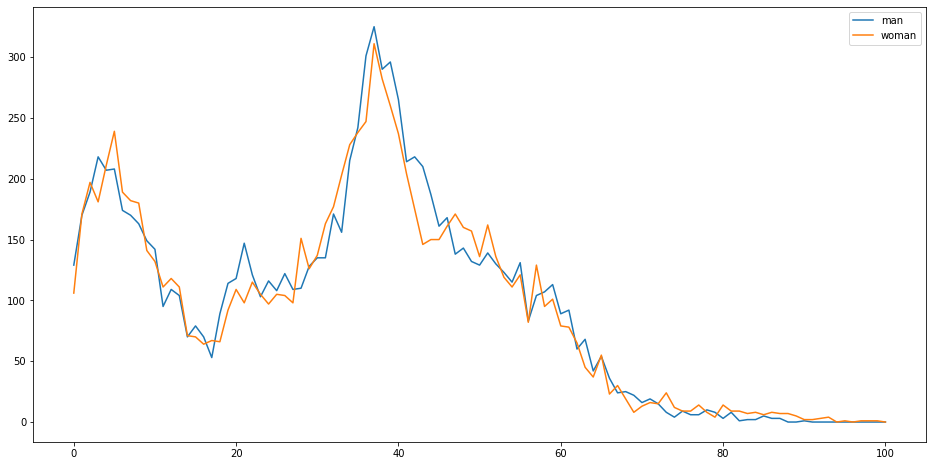

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 프레임 살펴보기
def df_info(df):
    print(df.head(), '\n')
    print(df.tail(), '\n')
    print(df.columns, '\n')
    print(df.info())

# 데이터프레임의 칼럼별 데이터값 확인 
def df_unique(df, num):     # 데이터프레임 이름과, 칼럼내의 유니크 데이터 갯수
    col = df.columns.to_list()
    for i in col:
        v_unique = df[i].unique()
        if len(v_unique) < num:
            print(f'{i} : {len(v_unique)}개','\n', f'{df[i].unique()}', '\n')
        else:
            pass

F_URL = '/content/drive/My Drive/data/dataset/연령별인구_2004.csv'  # 파일 URL
df = pd.read_csv(F_URL, encoding = 'cp949', thousands=',')  # 천의 자리 구분 콤마 빼고 CSV파일 불러오기

a = df.columns.difference(['행정구역']).tolist() # 특정 칼럼만 제외하고 선택하여 리스트로 바꾸기
df[a].apply(pd.to_numeric)     # 특정칼럼만 데이터를 숫자로 바꾸기

city = input('인구현황 조회를 원하는 동이름을 입력하시오 : ')
df_city = df[df['행정구역'].str.contains(city)] # 새솔동 이름 들어간 행을 선택하기
df_man = df_city.iloc[:, 3:104]     # 남자 인구부분만 선택
df_woman = df_city.iloc[:,106:208]  # 여자 인구부분만 선택

man = df_man.T  # 데이터 프레임 행렬 바꾸
man = man.reset_index(drop=True)    # 인덱스 0부터 번호 다시 따기
man.columns = ['man']    # 칼럼 이름 바꾸기
woman = df_woman.T  # 데이터 프레임 행렬 바꾸기
woman = woman.reset_index(drop=True)    # 인덱스 0부터 번호 다시 따기
woman.columns = ['woman']  # 칼럼 이름 바꾸기
df_merge = pd.merge(man, woman, how='outer', left_index=True, right_index=True)     # 데이터 프레임 합치기 

# plt.figure(figsize = (10, 5), dpi = 150)
# plt.plot(df_merge)
df_merge.plot(figsize = (16, 8))